In [701]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
import time
start_time = time.time()



In [702]:
# Load the dataset (replace 'weightgain.csv' with the actual CSV file path)
weightgain = pd.read_csv('/Users/rahulkisandabilkar/Downloads/weightgain.csv')


In [703]:
# Calculate means and standard deviations
means = weightgain.groupby(['source', 'type'])['weightgain'].mean()
sds = weightgain.groupby(['source', 'type'])['weightgain'].std()


In [704]:
print("Means:\n", means)
print("\nStandard Deviations:\n", sds)

Means:
 source  type
Beef    High    100.0
        Low      79.2
Cereal  High     85.9
        Low      83.9
Name: weightgain, dtype: float64

Standard Deviations:
 source  type
Beef    High    15.136417
        Low     13.886844
Cereal  High    15.021836
        Low     15.708809
Name: weightgain, dtype: float64


In [705]:
# Perform ANOVA
model = ols('weightgain ~ C(source) * C(type)', data=weightgain).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:\n", anova_table)



ANOVA Table:
                    sum_sq    df         F    PR(>F)
C(source)           220.9   1.0  0.987949  0.326878
C(type)            1299.6   1.0  5.812309  0.021145
C(source):C(type)   883.6   1.0  3.951798  0.054468
Residual           8049.4  36.0       NaN       NaN


In [706]:
# Get the coefficients
print("\nCoefficients:\n", model.params)



Coefficients:
 Intercept                             100.0
C(source)[T.Cereal]                   -14.1
C(type)[T.Low]                        -20.8
C(source)[T.Cereal]:C(type)[T.Low]     18.8
dtype: float64


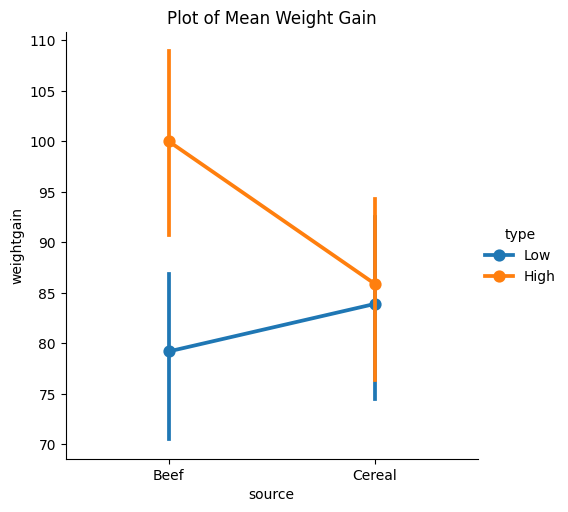

In [707]:
# Plot the design (mean weight gain for each level of the two factors)
sns.catplot(x='source', y='weightgain', hue='type', kind='point', data=weightgain)
plt.title('Plot of Mean Weight Gain')
plt.show()


In [708]:
# Load the foster dataset (replace 'foster.csv' with the actual CSV file path)
foster = pd.read_csv('/Users/rahulkisandabilkar/downloads/foster.csv')


In [709]:
# Ensure 'litgen' and 'motgen' are treated as strings (convert to strings)
foster['litgen'] = foster['litgen'].astype(str)  # Convert to string type
foster['motgen'] = foster['motgen'].astype(str)  # Convert to string type


In [710]:
# Step 1: Perform Two-way ANOVA with interaction between litgen and motgen (Type I ANOVA)
model_foster = ols('weight ~ C(litgen) * C(motgen)', data=foster).fit()
anova_foster = sm.stats.anova_lm(model_foster, typ=1)


In [711]:
# Display ANOVA table
print("\nANOVA Table for Foster Feeding Data (Type I):\n", anova_foster)



ANOVA Table for Foster Feeding Data (Type I):
                        df       sum_sq     mean_sq         F    PR(>F)
C(litgen)             3.0    60.157286   20.052429  0.369696  0.775221
C(motgen)             3.0   775.080588  258.360196  4.763246  0.005736
C(litgen):C(motgen)   9.0   824.072512   91.563612  1.688108  0.120053
Residual             45.0  2440.816500   54.240367       NaN       NaN


In [712]:
# Step 2: Tukey's HSD Test for pairwise comparisons between motgen levels
tukey_hsd = pairwise_tukeyhsd(foster['weight'], foster['motgen'], alpha=0.05)
print("\nTukey HSD Results for motgen:\n", tukey_hsd)



Tukey HSD Results for motgen:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      3.3 0.6418   -4.101  10.701  False
     A      I  -2.0375 0.8745  -9.1876  5.1126  False
     A      J    -6.72 0.0797 -13.9883  0.5483  False
     B      I  -5.3375  0.236 -12.7385  2.0635  False
     B      J   -10.02 0.0045 -17.5353 -2.5047   True
     I      J  -4.6825 0.3306 -11.9508  2.5858  False
-----------------------------------------------------


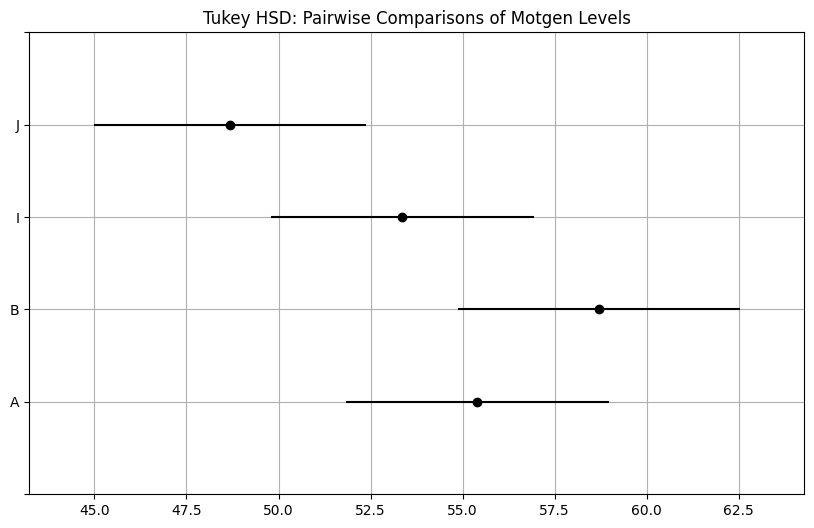

In [713]:
# Plotting Tukey's HSD results
tukey_hsd.plot_simultaneous()
plt.title("Tukey HSD: Pairwise Comparisons of Motgen Levels")
plt.grid(True)
plt.show()


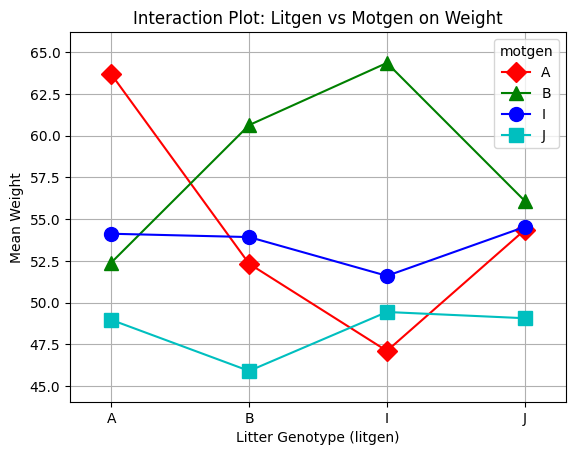

In [714]:
# Step 3: Interaction plot between litgen, motgen, and weight
# Create interaction plot ensuring 'litgen' and 'motgen' are treated as categorical
# 'litgen' and 'motgen' should be categorical types for interaction_plot
fig = interaction_plot(foster['litgen'], foster['motgen'], foster['weight'],
                       markers=['D', '^', 'o', 's'], ms=10, colors=['r', 'g', 'b', 'c'])

plt.title('Interaction Plot: Litgen vs Motgen on Weight')
plt.xlabel('Litter Genotype (litgen)')
plt.ylabel('Mean Weight')
plt.grid(True)
plt.show()

In [715]:
# Load the water dataset (replace 'water.csv' with the actual CSV file path)
water = pd.read_csv('/Users/rahulkisandabilkar/Downloads/water.csv')


In [716]:
# Perform MANOVA for water hardness and mortality
from statsmodels.multivariate.manova import MANOVA


In [717]:
manova = MANOVA.from_formula('hardness + mortality ~ location', data=water)
print("\nMANOVA Results:\n", manova.mv_test())



MANOVA Results:
                    Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0085 2.0000 58.0000 3388.2072 0.0000
         Pillai's trace   0.9915 2.0000 58.0000 3388.2072 0.0000
 Hotelling-Lawley trace 116.8347 2.0000 58.0000 3388.2072 0.0000
    Roy's greatest root 116.8347 2.0000 58.0000 3388.2072 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            location        Value  Num DF  Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda 0.5263 2.0000 58.0000 26.1062 0.0000
             Pillai's trace

In [718]:
# Calculate means
mean_hardness = water.groupby('location')['hardness'].mean()
mean_mortality = water.groupby('location')['mortality'].mean()


In [719]:
print("\nMean Hardness by Location:\n", mean_hardness)
print("\nMean Mortality by Location:\n", mean_mortality)



Mean Hardness by Location:
 location
North    30.400000
South    69.769231
Name: hardness, dtype: float64

Mean Mortality by Location:
 location
North    1633.600000
South    1376.807692
Name: mortality, dtype: float64


In [720]:
# Load the skulls dataset (replace 'skulls.csv' with the actual CSV file path)
skulls = pd.read_csv('/Users/rahulkisandabilkar/Downloads/skulls.csv')


In [721]:
# Calculate means for each epoch
means = skulls.groupby('epoch').mean()
print("\nMeans:\n", means)



Means:
                  mb          bh         bl         nh
epoch                                                
c1850BC  134.466667  133.800000  96.033333  50.566667
c200BC   135.500000  132.300000  94.533333  51.966667
c3300BC  132.366667  132.700000  99.066667  50.233333
c4000BC  131.366667  133.600000  99.166667  50.533333
cAD150   136.166667  130.333333  93.500000  51.366667


In [722]:
# Perform MANOVA for skull measurements
manova_skulls = MANOVA.from_formula('mb + bh + bl + nh ~ epoch', data=skulls)
print("\nMANOVA Results for Skulls:\n", manova_skulls.mv_test())



MANOVA Results for Skulls:
                     Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0026 4.0000 142.0000 13569.3221 0.0000
         Pillai's trace   0.9974 4.0000 142.0000 13569.3221 0.0000
 Hotelling-Lawley trace 382.2344 4.0000 142.0000 13569.3221 0.0000
    Roy's greatest root 382.2344 4.0000 142.0000 13569.3221 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
             epoch          Value   Num DF  Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.6636 16.0000 434.4548  3

In [723]:
# Univariate ANOVA for each response variable
for var in ['mb', 'bh', 'bl', 'nh']:
    model = ols(f'{var} ~ C(epoch)', data=skulls).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA Table for {var}:\n", anova_table)



ANOVA Table for mb:
                sum_sq     df         F    PR(>F)
C(epoch)   502.826667    4.0  5.954613  0.000183
Residual  3061.066667  145.0       NaN       NaN

ANOVA Table for bh:
                sum_sq     df        F   PR(>F)
C(epoch)   229.906667    4.0  2.44742  0.04897
Residual  3405.266667  145.0      NaN      NaN

ANOVA Table for bl:
                sum_sq     df         F    PR(>F)
C(epoch)   803.293333    4.0  8.305665  0.000005
Residual  3505.966667  145.0       NaN       NaN

ANOVA Table for nh:
                sum_sq     df         F    PR(>F)
C(epoch)    61.200000    4.0  1.506997  0.203179
Residual  1472.133333  145.0       NaN       NaN


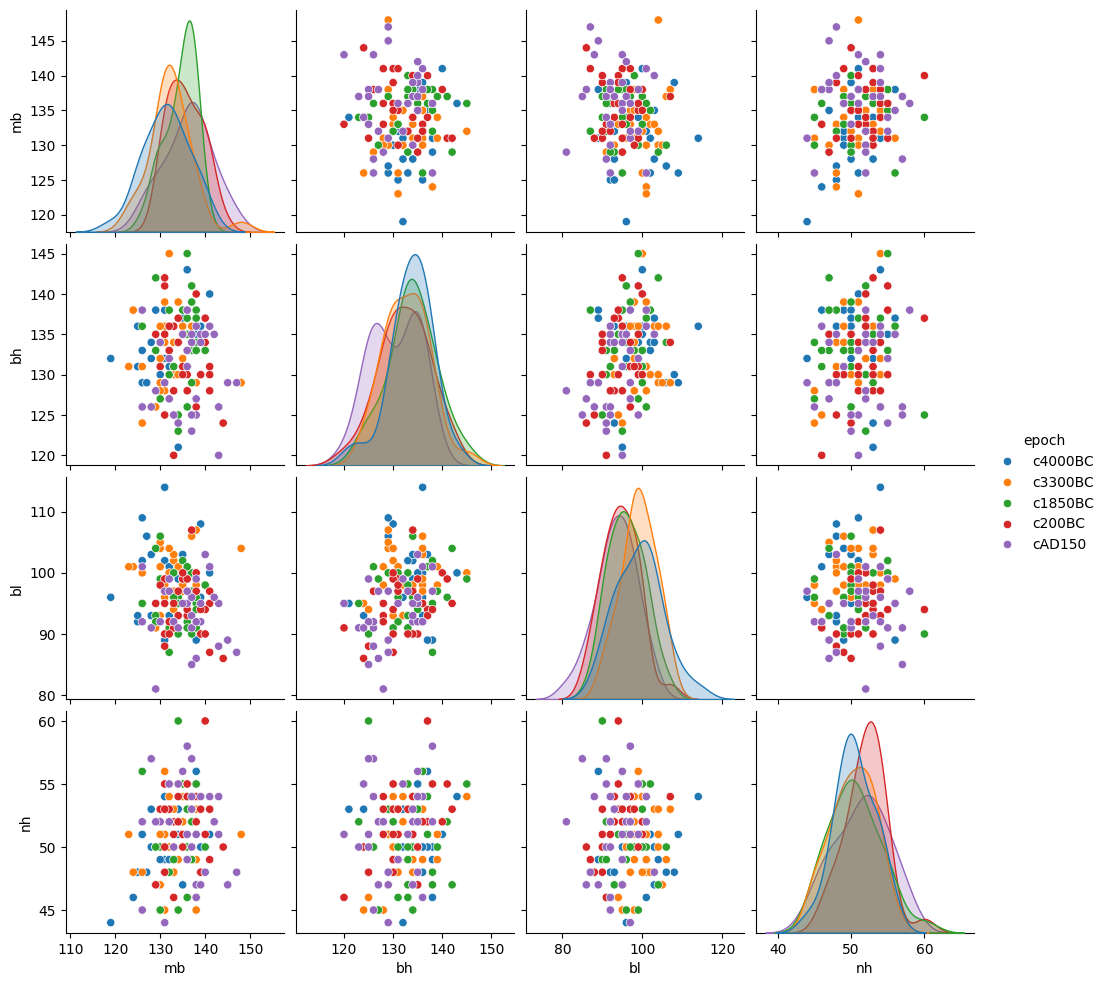

In [724]:
# Scatterplot matrix
sns.pairplot(skulls, hue='epoch')
plt.show()

In [ ]:
end_time = time.time()
total_time = end_time - start_time
print(f"Total Execution Time: {total_time} seconds")
